In [3]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
train = pd.read_excel(r"G:\traindata\rxdata\rx_monthsale.xlsx")

(array([736695., 736785., 736876., 736968., 737060., 737150., 737241.,
        737333., 737425., 737516.]),
 <a list of 10 Text xticklabel objects>)

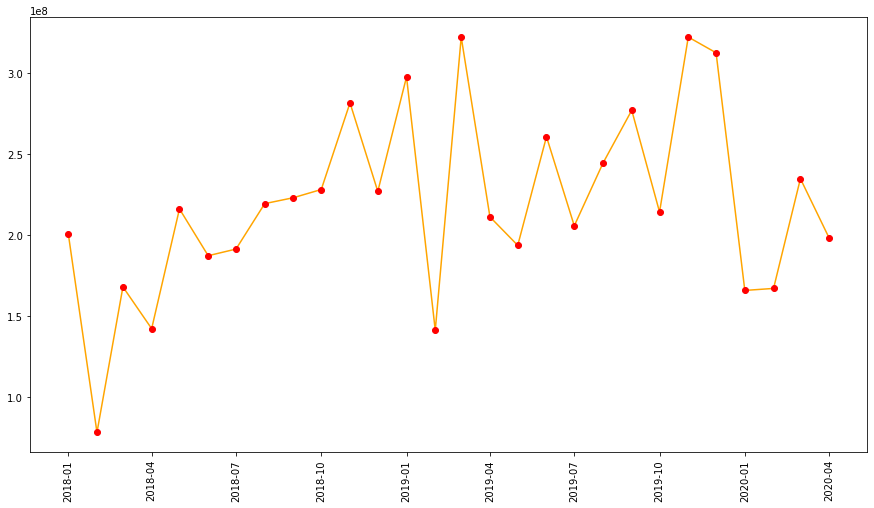

In [5]:
import matplotlib.pyplot as plt#展示
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
ax.plot(train['months'],train['money'],c="orange",label= "Data")
ax.plot(train['months'],train['money'],'ro')
plt.xticks(rotation=90)
plt.show()

In [31]:
train  = pd.DataFrame(train)#设定Xy及数据处理
X = train['months']
X = X.apply(pd.to_datetime)
X = X.map(dt.datetime.toordinal)
X = X.values.reshape(-1, 1)
y = train.iloc[:,-1]
y = y.values.reshape(-1, 1)

In [32]:
# scaler = MinMaxScaler() #实例化
# scaler = scaler.fit(y) #fit，在这里本质是生成min(x)和max(x)
# result = scaler.transform(y) #通过接口导出结果
# result
# y = result
# scaler = StandardScaler()
# result = scaler.fit_transform(y)
# result 
# y = result

In [33]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=445)#划分训练集和测试集

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5,include_bias=False)#添加多项式回归，增加拟合程度，不生成与截距相乘的X0
Xtrain_poly = poly.fit_transform(Xtrain)#分别对训练集和测试集进行处理
Xtest_poly = poly.fit_transform(Xtest)#
X_poly = poly.fit_transform(X)

In [35]:
model = LinearRegression(normalize=True).fit(Xtrain_poly,Ytrain)
j = model.score(Xtest_poly,Ytest)
j

-0.27761448270748246

In [36]:
y_pre = model.predict(Xtest_poly)
Y_pre = model.predict(X_poly)


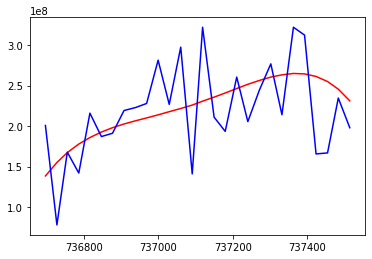

In [37]:
plt.plot(X,Y_pre,'r-')
plt.plot(X,y,'b-')
plt.show()

In [38]:
# mod_coef = model.coef_     #截距
# mod_coef
# mod_intercept = model.intercept_ #斜率
# X_test = pd.DataFrame(np.array([
#    ['2020-06-01'],], dtype='datetime64[ns]'))
# X_test.columns = ["Date"]
# X_test['Date'] = pd.to_datetime(X_test['Date'])
# X_test['Date']=X_test['Date'].map(dt.datetime.toordinal)
# X_test['Date']
# X = X.values.reshape(-1,1
# X_input = X_input.map(dt.datetime.toordinal)
# X_input =X_input.values.reshape(-1, 1)
# X_input_poly = poly.fit_transform(X_input.reshape(-1,1))
# X_input_poly
test= pd.read_excel(r"G:\traindata\rxdata\rx_test.xlsx")
test =pd.DataFrame(test)
pre_month = test['months']
pre_month = pre_month.apply(pd.to_datetime)
pre_month = pre_month.map(dt.datetime.toordinal)
pre_month = pre_month.values.reshape(-1, 1)
pre_month
pre_month_poly = poly.fit_transform(pre_month.reshape(-1,1))
# pre_month_poly

In [39]:
y_predict = model.predict(pre_month_poly)
y_predict

array([[ 1.55451392e+08],
       [ 1.47062784e+08],
       [ 1.15081216e+08],
       [ 6.56670720e+07],
       [ 8.38860800e+06],
       [-6.16038400e+07],
       [-1.40771328e+08]])

In [40]:
reg = LinearRegression().fit(Xtrain,Ytrain)

In [41]:
y_predict =reg.predict(Xtest)

In [42]:
# reg.score(Xtrain,Ytrain)

In [43]:
reg.score(Xtest,Ytest)

-0.7957869440941399

<function matplotlib.pyplot.show(*args, **kw)>

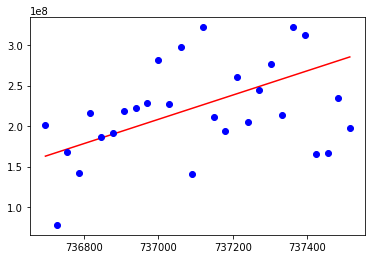

In [44]:
y_hat = reg.predict(X)
plt.plot(X,y_hat,'r-')
plt.plot(X,y,'bo')
plt.show

In [45]:
reg_coef = reg.coef_     #截距
reg_intercept = reg.intercept_ #斜率
X_test = pd.DataFrame(np.array([
   ['2020-07-21'],], dtype='datetime64[ns]'))
X_test.columns = ["Date"]
X_test['Date'] = pd.to_datetime(X_test['Date'])
X_test['Date']=X_test['Date'].map(dt.datetime.toordinal)
X_test['Date']
prediction = reg_coef*int(X_test['Date'])+reg_intercept
prediction

array([[3.02026509e+08]])

<function matplotlib.pyplot.show(*args, **kw)>

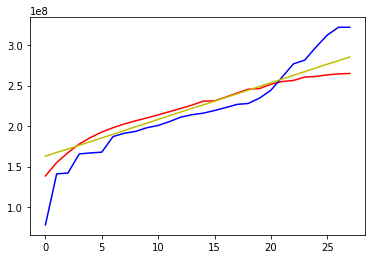

In [46]:
plt.plot(range(len(Y_pre)),sorted(Y_pre),'r-',label = 'polypredict')
plt.plot(range(len(y)),sorted(y),'b-',label = 'data')
plt.plot(range(len(y_hat)),sorted(y_hat),'y-',label = 'predict')
plt.show

In [47]:
from sklearn.metrics import mean_absolute_error

In [48]:
mean_absolute_error(Ytest,y_predict)#平均绝对误差

60791143.66505262

In [49]:
mean_absolute_error(Ytest,y_pre)#多项平均绝对误差

52463854.93111111